In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [3]:

# Set parameters
# img_height = 150
# img_width = 100
img_height = 200
img_width = 200
num_classes = 100  # Assuming 100 classes in your dataset

# Set up data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1.0 / 255.0
)

# Load and preprocess the training and testing datasets
# Replace 'path/to/train' and 'path/to/test' with your actual dataset paths
train_datagen = data_augmentation.flow_from_directory(
    'data/train_test_img/train_preprocess',
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='grayscale',  # Convert to grayscale
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
    'data/train_test_img/test_preprocess',
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 1900 images belonging to 100 classes.
Found 200 images belonging to 100 classes.


# CNN Model

In [3]:

# Build a simple CNN architecture (80%)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer with 100 classes
])

# Current architecture with added Dropout (90% - 70%)
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),  # Image size (150, 100) and single channel (grayscale)
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.Dropout(0.2),  # Add dropout to third Conv layer
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),  # Add dropout to third Conv layer
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),  # Keep the original dropout
#     layers.Dense(100, activation='softmax')  # Output layer with 100 classes
# ])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\PC-MOH\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model (250epochs=>94%)
history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=200  # Adjust the number of epochs as needed
)

Epoch 1/200


c:\Users\PC-MOH\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.0070 - loss: 4.6665 - val_accuracy: 0.0100 - val_loss: 4.6045
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - accuracy: 0.0115 - loss: 4.6054 - val_accuracy: 0.0200 - val_loss: 4.5908
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.0092 - loss: 4.5819 - val_accuracy: 0.0300 - val_loss: 4.5051
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - accuracy: 0.0166 - loss: 4.5339 - val_accuracy: 0.0300 - val_loss: 4.3450
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - accuracy: 0.0208 - loss: 4.4376 - val_accuracy: 0.0750 - val_loss: 4.2503
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.0447 - loss: 4.3319 - val_accuracy: 0.0850 - val_loss: 4.0836
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.0486 - loss: 4.2342 - val_accuracy: 0.1250 - val_loss: 3.7958
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.0577 - loss: 4.0744 - val_accuracy

In [5]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_datagen)
print("Test accuracy CNN:", test_accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9843 - loss: 0.0700
Test accuracy CNN: 0.9850000143051147


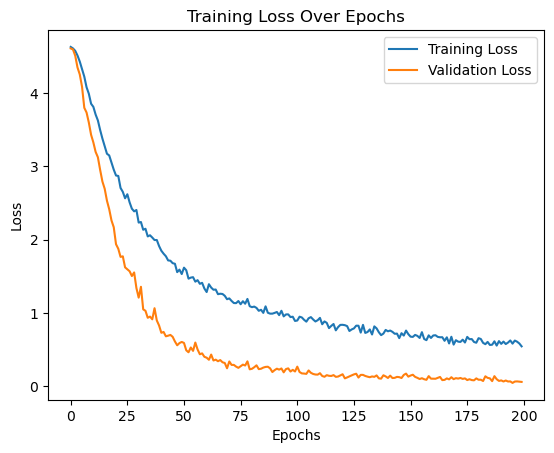

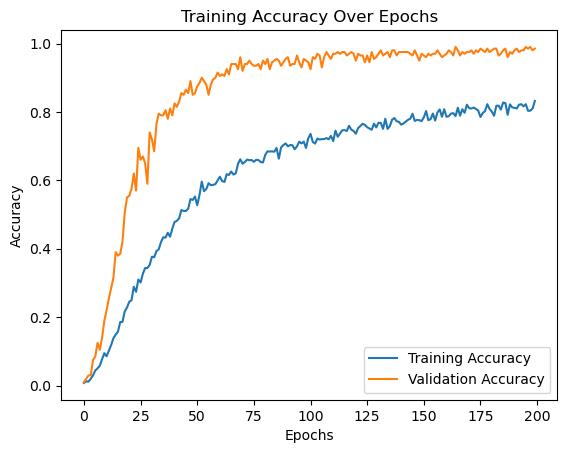

In [6]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Training loss over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training Accuracy Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot


# ANN Model

In [13]:
# Define the ANN architecture
modelANN = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 1)),  # Flatten the image
    layers.Dense(512, activation='relu'),  # First hidden layer
    layers.Dropout(0.3),  # Dropout again
    layers.Dense(256, activation='relu'),  # First hidden layer
    layers.Dropout(0.2),  # Dropout again
    layers.Dense(256, activation='relu'),  # First hidden layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for 100 classes
])

# Compile the model
modelANN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train the model
historyANN = modelANN.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=50  # Adjust the number of epochs as needed
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.0144 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.0110 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.0120 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.0083 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.0068 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.0112 - loss: 4.6059 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.0089 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.0065 - loss: 4.6056 - val_accu

In [6]:
# Evaluate the model
test_loss, test_accuracy = modelANN.evaluate(test_datagen)
print("Test accuracy ANN:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0069 - loss: 4.6052   
Test accuracy ANN: 0.009999999776482582


In [10]:
# import matplotlib.pyplot as plt

# # Plot the training loss over epochs
# plt.plot(historyANN.history['loss'], label='Training Loss')  # Training loss over epochs
# plt.plot(historyANN.history['val_loss'], label='Validation Loss')  # Training loss over epochs
# plt.xlabel('Epochs')  # X-axis label
# plt.ylabel('Loss')  # Y-axis label
# plt.title('Training Loss Over Epochs')  # Plot title
# plt.legend()  # Display the legend
# plt.show()  # Display the plot

# # Plot the training accuracy over epochs
# plt.plot(historyANN.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
# plt.plot(historyANN.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
# plt.xlabel('Epochs')  # X-axis label
# plt.ylabel('Accuracy')  # Y-axis label
# plt.title('Training Accuracy Over Epochs')  # Plot title
# plt.legend()  # Display the legend
# plt.show()  # Display the plot
